<a href="https://colab.research.google.com/github/gcasado0/ciencia_datos/blob/master/U3_Ej2_Ej3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio N° 2
El dataset alimentos.csv fue elaborado por una clínica de nutrición que suministró a sus pacientes
una lista de alimentos permitidos con sus respectivos contenidos calóricos. También se detalló el tipo
de alimento del que se trataba (fruta, verdura, etc.) y el tipo de vitamina que aportaba cada uno (A,
B o C).
Por otra parte, la nutricionista a cargo del estudio lleva una planilla de control de la evolución de 50
pacientes (pacientes.csv) en la que registra la edad, el sexo, la altura, el peso inicial y el peso final
de cada uno de ellos luego de seguir un plan de dieta por una cierta cantidad de tiempo, información
que también fue registrada en el campo “tiempo de tratamiento”.

## 1. Importe ambos datasets al entorno de trabajo y realice cualquier tarea de limpieza y/o adecuación de los mismos que considere necesaria.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
archivo= '/content/drive/MyDrive/TUIA/Fundamentos CD/datasets/unidad3/alimentos.csv'
alimentos = pd.read_csv(archivo, encoding='latin-1', sep=";")
alimentos.head()

,alimento,aporte_calorico_kcal,tipo_de_alimento,vitamina
0,banana,81,fruta,A
1,kiwi,36,fruta,B
2,higo,62,fruta,B
3,repollo,22,verdura,A
4,col,12,verdura,A


In [8]:
alimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   alimento              99 non-null     object
 1   aporte_calorico_kcal  99 non-null     int64 
 2   tipo_de_alimento      99 non-null     object
 3   vitamina              99 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [20]:
archivo= '/content/drive/MyDrive/TUIA/Fundamentos CD/datasets/unidad3/pacientes.csv'
pacientes = pd.read_csv(archivo, encoding='latin-1', sep=";")
pacientes.head()

,codigo_paciente,peso_inicial_kg,peso_final_kg,altura_m,sexo,tiempo_tratamiento_dias
0,398911,78,72,"1,8",F,583
1,398912,68,68,"1,75",F,159
2,398913,92,70,"1,85",F,70
3,398914,66,64,"1,65",M,41
4,398915,51,50,"1,55",F,30


In [21]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   codigo_paciente          50 non-null     int64 
 1   peso_inicial_kg          50 non-null     int64 
 2   peso_final_kg            50 non-null     int64 
 3   altura_m                 50 non-null     object
 4   sexo                     50 non-null     object
 5   tiempo_tratamiento_dias  50 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [22]:
# convertir altura_m a float
pacientes['altura_m'] = pacientes['altura_m'].str.replace(",",".").astype(float)
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   codigo_paciente          50 non-null     int64  
 1   peso_inicial_kg          50 non-null     int64  
 2   peso_final_kg            50 non-null     int64  
 3   altura_m                 50 non-null     float64
 4   sexo                     50 non-null     object 
 5   tiempo_tratamiento_dias  50 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 2.5+ KB


## 2. En relación al campo aporte_calorico_kcal informe las medidas descriptivas que le brinden información sobre los siguientes aspectos:

• Las kcal que aportan, en promedio, los alimentos que forman parte del dataset.

In [27]:
print(f"Media aritmetica: {round(alimentos['aporte_calorico_kcal'].mean(),2)}")

Media aritmetica: 124.51


• Aquel valor de aporte calórico tal que el 50% de los alimentos del dataset presentan aportes calóricos menores o iguales a él.

In [28]:
print(f"Mediana: {round(alimentos['aporte_calorico_kcal'].median(),2)}")

Mediana: 66.0


• El rango en el que se encuentra el 50% central de las observaciones.

In [40]:
Q1=alimentos['aporte_calorico_kcal'].quantile(q=0.25)
Q3=alimentos['aporte_calorico_kcal'].quantile(q=0.75)
RI=Q3-Q1

print(f"El rango intercuartílico (Q1-Q3) está entre: {Q1} y {Q3}")

El rango intercuartílico (Q1-Q3) está entre: 31.5 y 93.5


• El o los valores que se presentan con mayor frecuencia entre las observaciones.

In [34]:
print(f"Moda: {list(alimentos['aporte_calorico_kcal'].mode())}")

Moda: [20, 75]


##3. Represente la distribución de las observaciones de la variable aporte_calorico_kcal a través de un boxplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


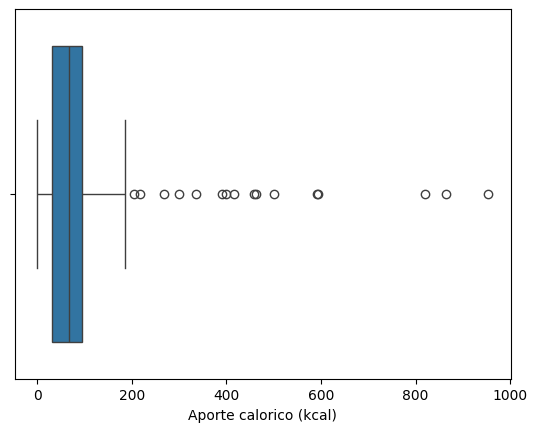

In [37]:
sns.boxplot(data=alimentos, x='aporte_calorico_kcal', orient='h')
plt.xlabel('Aporte calorico (kcal)');

• ¿Cómo caracterizaría a la distribución en relación a sus características de simetría?

La distribucion es asimetrica a la derecha.

• En función a lo observado, ¿qué par de medidas de centralidad/posición (media aritmética - mediana) y de dispersión (rango intercuartil - rango - desviación estándar) le parece más adecuada para describir a este conjunto?

Me parece mas adecuado la mediana y el rango intercuartil.

• ¿Existe alguna observación que pueda ser considerada como atípica? En caso de respuesta afirmativa, ¿cuántas observaciones recibirían esta calificación?

In [48]:
# (Q1 - 1.5 RI) y (Q3 + 1.5 RI)
extremo_superior = Q3 + 1.5 * RI
extremo_inferior = Q1 - 1.5 * RI

In [60]:
alimentos[ (alimentos['aporte_calorico_kcal'] > extremo_superior) | (alimentos['aporte_calorico_kcal'] < extremo_inferior)].sort_values('aporte_calorico_kcal')

,alimento,aporte_calorico_kcal,tipo_de_alimento,vitamina
55,avellana,204,fruto seco,A
75,galletas de avena,217,elaborada,C
47,mermelada,267,elaborada,B
54,nuez pecan,299,fruto seco,B
78,papaya,336,fruta,C
22,salame,390,elaborada,B
46,empanadas,400,elaborada,B
66,coco,416,fruto seco,A
56,almendra,458,fruto seco,B
71,arrollado,463,elaborada,B


##4. ¿Qué tipo de alimento presenta la mayor mediana de aporte calórico?

In [64]:
alimentos.groupby("tipo_de_alimento")['aporte_calorico_kcal'].median().sort_values()

,aporte_calorico_kcal
tipo_de_alimento,
verdura,37.0
animal,49.5
fruta,55.0
fruto seco,113.0
elaborada,217.0


In [71]:
print(f"El alimento con mayor mediana de aporte calorico es: {list(alimentos.groupby('tipo_de_alimento')['aporte_calorico_kcal'].median().sort_values().tail(1).index)[0]} con {list(alimentos.groupby('tipo_de_alimento')['aporte_calorico_kcal'].median().sort_values().tail(1).values)[0]} calorias")

El alimento con mayor mediana de aporte calorico es: elaborada con 217.0 calorias


## 5. Realice un boxplot múltiple para representar la distribución de los aportes calóricos de alimentos de los siguientes tipos: frutas, verduras y alimentos elaborados.

In [82]:
alimentos_filtrados = alimentos[alimentos['tipo_de_alimento'].isin(['fruta','verdura','elaborada'])]

In [83]:
orden_mediana = alimentos_filtrados.groupby("tipo_de_alimento")['aporte_calorico_kcal'].median().sort_values().index

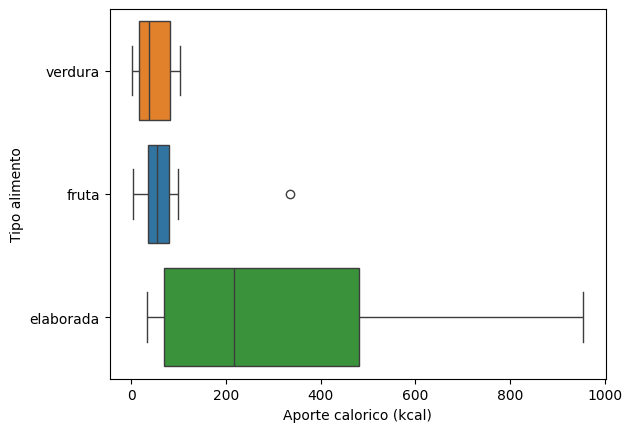

In [86]:
sns.boxplot(x = 'aporte_calorico_kcal', y = 'tipo_de_alimento', hue = 'tipo_de_alimento', order=orden_mediana, data = alimentos_filtrados)
plt.xlabel('Aporte calorico (kcal)')
plt.ylabel('Tipo alimento');

• ¿Qué tipo de alimentos presenta valores calóricos más variables y cuál menos variables?

Los alimentos elaborados son los de mayor variabilidad, mientras que las verduras y frutas presentan muy poca variabilidad. Salvo un outlier en la fruta.

• ¿Qué medida descriptiva utilizó para responder a estas últimas preguntas?

El rango intercuartílico del boxplot por tipo de alimento

## 6. Utilizando los datos de los/las pacientes, genere una variable que corresponda a la variación de peso para cada paciente a lo largo del tratamiento (peso_final_kg - peso_inicial_kg).

In [89]:
pacientes['variacion_peso_kg'] = pacientes['peso_final_kg']-pacientes['peso_inicial_kg']

• Represente la distribución de los valores observados de la variable “diferencia de peso” para ambos sexos a través de un boxplot múltiple.

Text(0.5, 0, 'Variacion Peso (kg)')

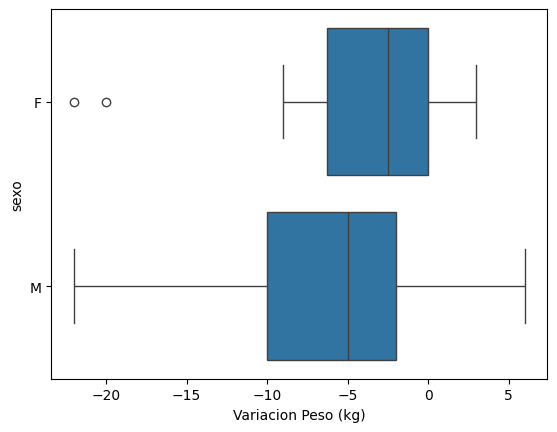

In [94]:
sns.boxplot(x="variacion_peso_kg", y="sexo", data=pacientes);
plt.xlabel("Variacion Peso (kg)")

• ¿Qué medida descriptiva utilizaría para comparar los resultados del tratamiento entre personas de ambos sexos? En función de su respuesta, ¿las personas de qué sexo obtuvieron los mejores resultados para el tratamiento?

1. Utilizaria la mediana.
2. Las del sexo masculino obtuvieron mejores resultados.


# Ejercicio N° 3
Teniendo en cuenta la variable altura_m que se encuentra en el dataset pacientes.csv trabajado en el Ejercicio anterior, genere una tabla de frecuencias en la que las observaciones se encuentren
segmentadas en subintervalos de 10 cm de amplitud que estén “cerrados por izquierda”, es decir, que tengan la forma [extremo_inferior, extremo_superior).
La tabla de frecuencias generada deberá contener columnas en las que se especifiquen las frecuencias absolutas, relativas y relativas acumuladas correspondientes a cada subintervalo.

¿Qué porcentaje de las personas del dataset tienen una altura menor a 1.8 m?